In [193]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


# Heart Failure Prediction

## 1. Загрузите данные

In [166]:
data = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [167]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 2. Опишите задачу словами. В том числе напишите, что значит каждый признак

Сердечно-сосудистые заболевания (ССЗ) являются причиной смерти номер 1 во всем мире, унося примерно 17,9 миллиона жизней ежегодно, что составляет 31% всех смертей в мире. Четыре из 5 смертей от сердечно-сосудистых заболеваний связаны с сердечными приступами и инсультами, и одна треть этих смертей происходит преждевременно среди людей в возрасте до 70 лет. Сердечная недостаточность является распространенным явлением, вызванным сердечно-сосудистыми заболеваниями, и этот набор данных содержит 11 признаков, которые можно использовать для прогнозирования возможного заболевания сердца.

Люди с сердечно-сосудистыми заболеваниями или с высоким сердечно-сосудистым риском (из-за наличия одного или нескольких факторов риска, таких как гипертония, диабет, гиперлипидемия или уже установленное заболевание) нуждаются в раннем выявлении и лечении, в то время как модель машинного обучения может оказать большую помощь.

1. ```Age```: Возраст пациента
2. ```Sex```: Пол пациента (M - мужчина, F - женщина)
3. ```ChestPainType```: Тип боли в груди (TA - типичная стенокардия, ATA - атипичаная стенокардия, NAP - неангинозная боль, ASY - бессимптомная)
4. ```RestingBP```: Артериальное давление в состоянии покоя
5. ```Cholesterol```: Холестерин сыворотки
6. ```FastingBS```: Уровень сахара в крови натощак (1 - если больше 120, 0 - иначе)
7. ```RestingECG```: Результаты электрокардиограммы в покое - (Normal - норма, ST - аномалия ST-T(инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), LVH - вероятная или определенная гипертрофия левого желудочка по критериям Эстеса)
8. ```MaxHR```: Максимальная частота сердечных сокращений в минуту
9. ```ExerciseAngina```: Стенокардия, вызванная физической нагрузкой (Y - есть стенокардия, N - нет)
10. ```Oldpeak```: oldpeak = ST
11. ```ST_Slope```: Наклон сегмента ST пикового упражнения (Up - восходящий наклон, Flat - плоский, Down - нисходящий)
12. ```HeartDisease```: Сердечная недостаточность (1 - болезнь сердца, 0 - все норм)

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## 3. Разбейте данные на обучающую и тестовую выборки

In [169]:
def traintestsplit(df, train_size):
    df = df.sample(frac=1)
    train_size = int(train_size * len(df))
    data_train = df[:train_size]
    data_test = df[train_size:]
    return data_train, data_test
    

data_train, data_test = traintestsplit(data, 0.8)

In [170]:
print(f'Train size df: {data_train.shape}')
print(f'Test size df: {data_test.shape}')

Train size df: (734, 12)
Test size df: (184, 12)


## 4. Визуализируйте данные из обучающей выборки. В частности, имеет смысл построить диаграммы рассеивания для количественных признаков. Построить гистограммы распределений и т.п. Вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретируйте результаты

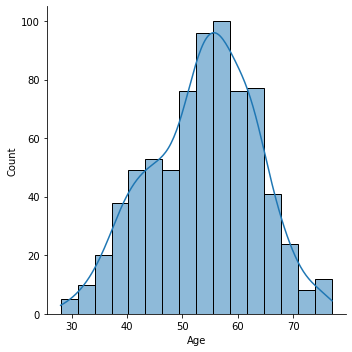

In [171]:
#Гистограмма распределения возраста в обучающей выборке
sns.displot(data_train['Age'], kde=True);

Вывод: преобладает возрастная группа от 50 до 65 лет. Похоже на нормальное распределение

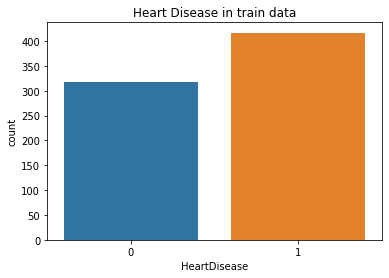

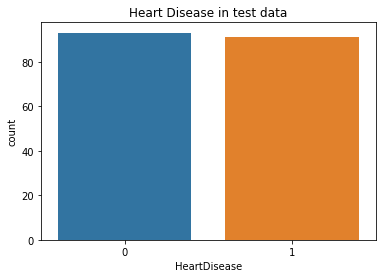

In [172]:
sns.countplot(data=data_train, x='HeartDisease');
plt.title('Heart Disease in train data')
plt.show()
sns.countplot(data=data_test, x='HeartDisease');
plt.title('Heart Disease in test data')
plt.show()

Вывод: дисбаланс таргет классов отсутствует, распределение данных +- равное

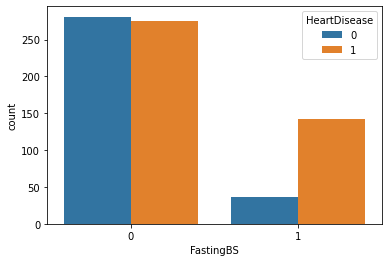

In [173]:
sns.countplot(data=data_train, x='FastingBS', hue='HeartDisease');

вывод: если у пациента высокий уровень сахара в крови натощак, то выше шанс на сердечную недостаточность?

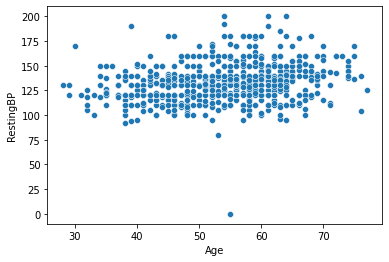

In [174]:
sns.scatterplot(data=data_train, x="Age", y="RestingBP");

Вывод: есть выбросы, например человек с давлением +-0. 3 записи с давлением +-200 (что в принципе возможно, если верить другу медику)

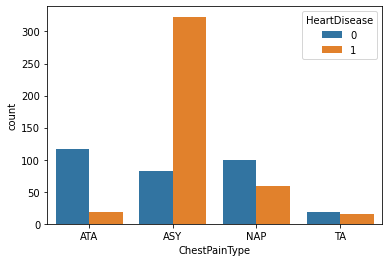

In [175]:
sns.countplot(data=data_train, x='ChestPainType', hue='HeartDisease');

Вывод: с типом боли в груди ASY (бессимптомная) больше всего случаев сердечной недостаточности, что странно. Возможно пациенты врут по поводу боли в груди для того, чтобы получить справку

In [176]:
def agegroup(df):
    df.loc[df['Age'] <= 36, 'AgeGroup'] = '(0-36)'
    df.loc[(df['Age'] > 36) & (df['Age'] <= 49), 'AgeGroup'] = '(37-49)'
    df.loc[(df['Age'] > 49) & (df['Age'] <= 65), 'AgeGroup'] = '(50-65)'
    df.loc[df['Age'] > 65, 'AgeGroup'] = '(66-∞)'
    return df


data_train = agegroup(data_train)
data_test = agegroup(data_test)

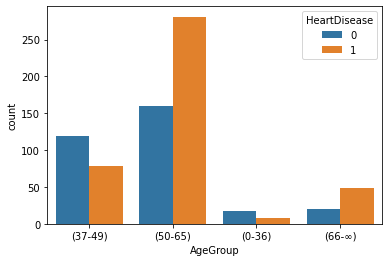

In [177]:
sns.countplot(data=data_train, x='AgeGroup', hue='HeartDisease');

In [178]:
query = """
select AgeGroup,
case when Sex = 'F' then 'Female' else 'Male' end Sex,
case when HeartDisease = 0 then 'Normal' else 'Heart Disease' end HeartDisease,
count(1) as ObsCount
from data_train group by AgeGroup, Sex, HeartDisease
order by AgeGroup, Sex, HeartDisease"""
sqldf(query, globals())

,AgeGroup,Sex,HeartDisease,ObsCount
0,(0-36),Female,Heart Disease,1
1,(0-36),Female,Normal,6
2,(0-36),Male,Heart Disease,7
3,(0-36),Male,Normal,12
4,(37-49),Female,Heart Disease,8
5,(37-49),Female,Normal,43
6,(37-49),Male,Heart Disease,71
7,(37-49),Male,Normal,76
8,(50-65),Female,Heart Disease,30
9,(50-65),Female,Normal,53


Вывод: 236 случая сердечной недостаточности у мужчин в возрасте от 50 до 65 лет

In [179]:
query = """
select case when Sex = 'F' then 'Female' else 'Male' end Sex,
count(1) as ObsCount
from data_train group by Sex
order by Sex"""
sqldf(query, globals())

,Sex,ObsCount
0,Female,153
1,Male,581


Вывод: мужчин в выборке больше в +-3 раза, поэтому и больше случаев с сердечной недостаточностью

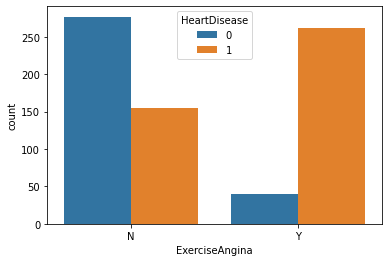

In [180]:
sns.countplot(data=data_train, x='ExerciseAngina', hue='HeartDisease');

вывод: если у пациента присутсвует стенокардия, тем выше риск на сердечную недостаточность

In [181]:
corr_df = data_train.corr(method='spearman')
corr_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.274443,-0.080137,0.211489,-0.364214,0.292806,0.285612
RestingBP,0.274443,1.000000,0.113281,0.067327,-0.112824,0.173251,0.107653
Cholesterol,-0.080137,0.113281,1.000000,-0.171467,0.205672,0.048688,-0.145517
FastingBS,0.211489,0.067327,-0.171467,1.000000,-0.106304,0.090148,0.262304
MaxHR,-0.364214,-0.112824,0.205672,-0.106304,1.000000,-0.198216,-0.403253
Oldpeak,0.292806,0.173251,0.048688,0.090148,-0.198216,1.000000,0.408157
HeartDisease,0.285612,0.107653,-0.145517,0.262304,-0.403253,0.408157,1.000000


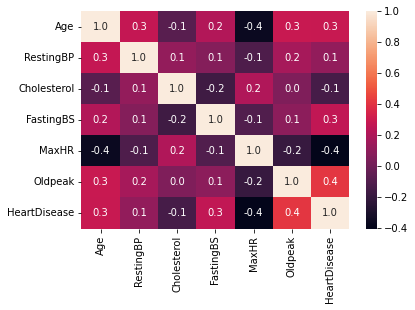

In [182]:
sns.heatmap(data_train.corr(method='spearman'), annot=True, fmt=".1f");

вывод: сильной положительной или отрицательной корреляции количественных признаков с таргет переменной не наблюдается. Топ2: максимальная частота сердечных сокращений в минуту (MaxHR) отрицательно коллерирует с HeartDisease и Oldpeak положительно коллерирует с HeartDisease. Можно задуматься стоит ли использовать линейные модели для этой задачи

In [183]:
data_train.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
count,734.000000,734,734,734.000000,734.000000,734.000000,734,734.000000,734,734.000000,734,734.000000,734
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN,4
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN,(50-65)
freq,NaN,581,405,NaN,NaN,NaN,447,NaN,432,NaN,378,NaN,441
mean,53.790191,NaN,NaN,132.224796,195.780654,0.242507,NaN,135.728883,NaN,0.868120,NaN,0.568120,NaN
std,9.431717,NaN,NaN,18.754823,111.993152,0.428891,NaN,25.618064,NaN,1.062722,NaN,0.495676,NaN
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN
25%,47.000000,NaN,NaN,120.000000,167.500000,0.000000,NaN,118.000000,NaN,0.000000,NaN,0.000000,NaN
50%,55.000000,NaN,NaN,130.000000,221.000000,0.000000,NaN,135.500000,NaN,0.500000,NaN,1.000000,NaN
75%,61.000000,NaN,NaN,140.000000,265.000000,0.000000,NaN,155.000000,NaN,1.500000,NaN,1.000000,NaN


1. Age: минимальный возраст - 28, максимальный возраст - 77, средний возраст - 54
2. Sex: в выборке преобладают записи с мужчинами, 575 записей из 734
3. ChesPainType: в выборке преобладают записи с типом боли в груди - ASY (бессимптомный), 404 записей из 734
4. RestingBP: минимальное давление - 0, максимальное - 200, в среднем давление - 130
5. Cholesterol: минимальный холестерин - 0, максимальный 603, среднее +-108
6. FastingBS: в выборке преобладают записи с нормальны уровнем сахара в крови
7. RestingECG: в выборке преобладают записи с нормальной ЭКГ
8. MaxHR: минимальный пульс - 60, максимальный 202, в среднем - 137
9. ExerciseAngina: в выборке преобладают записи с пациентами у которых нет стенокардии
10. Oldpeak: минимальное значение - -2.6, максимальное - 6.2, среднее - 0.88
11. ST_Slope - в выборке преобладают записи с плоским наклоном сегмента ST пикового упражнения 

Конечно для адекватной работы нужно погружаться в предметную область и лучше понимать за что вообще отвечают столбцы Oldpeak и ST_Slope. Также в практическом смысле нужно знать как MaxHR, Cholosterol и RestingBP могу влиять на наличие сердечной недостаточности

## 5. Обработать пропущенные значения (или убедиться, что их нет)

In [184]:
data_train.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
AgeGroup          0
dtype: int64

Пропущенных значений в выборке нет

## 6. Исключить нерелевантные признаки (объяснить, как вы их нашли)

Не исключаю признаки

## 7. Если необходимо, то обработать коррелированные признаки

Сильной корреляции между количественными признаками не обнаружено

## 8. Обработать категориальные признаки

In [185]:
data_train.dtypes.value_counts()

int64      6
object     6
float64    1
dtype: int64

In [186]:
def labelencode(df):
    le = LabelEncoder()
    le_count = 0
    for col in df:
        if df[col].dtype == 'object':
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
    print(f'{le_count} columns were label encoded')
    return df
    

data_train = labelencode(data_train)
data_test = labelencode(data_test)

6 columns were label encoded
6 columns were label encoded


In [187]:
data_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
152,40,1,1,130,275,0,1,150,0,0.0,2,0,1
46,37,1,0,120,223,0,1,168,0,0.0,2,0,1
640,48,0,2,130,275,0,1,139,0,0.2,2,0,1
474,62,1,1,131,0,0,1,130,0,0.1,2,0,2
866,44,1,1,130,219,0,0,188,0,0.0,2,0,1


## 9. Провести масштабирование (или объяснить, почему в вашем случае она не нужна)

Не буду делать масшатабирование, так как линейные модели скорее всего покажут результат хуже чем деревья из за плохой линейной корреляции

## 10. Вам может понадобиться другая предобработка. Например, если в вашем датасете есть текстовые признаки с уникальными значениями (например, аннотации товаров, отзывы пользователей, другие тексты), как в двух последних датасетах из перечисленных, то вам понадобится этап извлечения признаков, т.е. простые методы NLP, как, например, bag-of-words. Воспользуйтесь библиотеками re, nltk

In [188]:
data_train = data_train.drop('Age', axis=1)
data_test = data_test.drop('Age', axis=1)

In [189]:
data_train.head()

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
152,1,1,130,275,0,1,150,0,0.0,2,0,1
46,1,0,120,223,0,1,168,0,0.0,2,0,1
640,0,2,130,275,0,1,139,0,0.2,2,0,1
474,1,1,131,0,0,1,130,0,0.1,2,0,2
866,1,1,130,219,0,0,188,0,0.0,2,0,1


## 11. После шагов 5–10 разумно вернутся к шагу 4 (а может, возвращаться к нему после каждого из этапов 5–10.

In [190]:
corr_df = data_train.corr(method='spearman')
corr_df

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
Sex,1.000000,-0.143904,0.031636,-0.187368,0.094717,0.076370,-0.219306,0.190508,0.098341,-0.149710,0.304177,0.079710
ChestPainType,-0.143904,1.000000,-0.001642,0.042275,-0.081896,-0.033101,0.308388,-0.377740,-0.239590,0.262867,-0.439840,-0.074883
RestingBP,0.031636,-0.001642,1.000000,0.113281,0.067327,0.041168,-0.112824,0.156551,0.173251,-0.081743,0.107653,0.251274
Cholesterol,-0.187368,0.042275,0.113281,1.000000,-0.171467,-0.176089,0.205672,0.015809,0.048688,0.063044,-0.145517,-0.080145
FastingBS,0.094717,-0.081896,0.067327,-0.171467,1.000000,0.060919,-0.106304,0.069524,0.090148,-0.166766,0.262304,0.201869
RestingECG,0.076370,-0.033101,0.041168,-0.176089,0.060919,1.000000,-0.173063,0.040619,-0.031490,0.012918,0.036114,-0.028697
MaxHR,-0.219306,0.308388,-0.112824,0.205672,-0.106304,-0.173063,1.000000,-0.378465,-0.198216,0.354981,-0.403253,-0.333832
ExerciseAngina,0.190508,-0.377740,0.156551,0.015809,0.069524,0.040619,-0.378465,1.000000,0.494321,-0.460732,0.505423,0.181859
Oldpeak,0.098341,-0.239590,0.173251,0.048688,0.090148,-0.031490,-0.198216,0.494321,1.000000,-0.515178,0.408157,0.255965
ST_Slope,-0.149710,0.262867,-0.081743,0.063044,-0.166766,0.012918,0.354981,-0.460732,-0.515178,1.000000,-0.593378,-0.240157


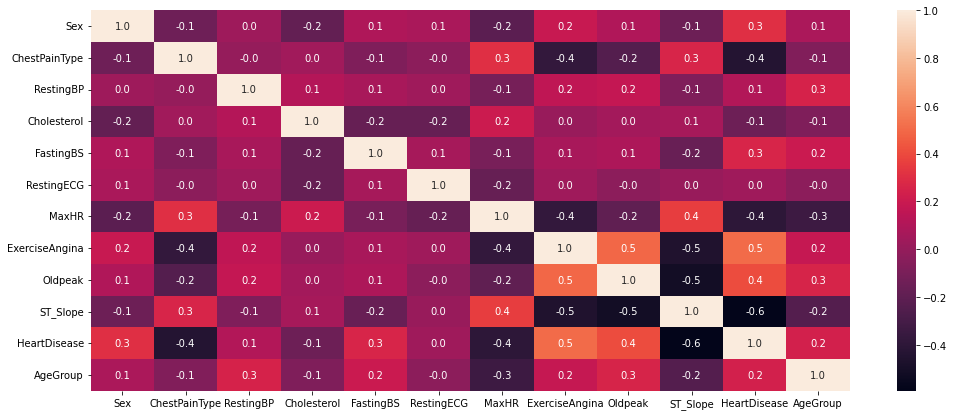

In [192]:
plt.figure(figsize=(17, 7))
sns.heatmap(data_train.corr(method='spearman'), annot=True, fmt=".1f");

Теперь присутствует больше признаков, которые дают неплохую линейную корреляцию

## 12. Попробуйте как минимум 3 метода классификации (регрессии). Объясните ваш выбор. Найдите значения метрик на обучающей и тестовой выборке. Сделайте вывод.

In [195]:
X = data_train.drop('HeartDisease', axis=1)
y = data_train['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (587, 11)
Testing data shape:  (147, 11)


### Baseline

In [197]:
models = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
          SVC(probability=True), LogisticRegression(), GradientBoostingClassifier()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'model: {str(model)}')
    print(f'ROC-AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1: {f1_score(y_test, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print('-'*30, '\n')

model: KNeighborsClassifier()
ROC-AUC: 0.6943499622071051
Precision: 0.7160493827160493
Recall: 0.6904761904761905
F1: 0.703030303030303
Accuracy: 0.6666666666666666
------------------------------ 

model: DecisionTreeClassifier()
ROC-AUC: 0.8015873015873015
Precision: 0.8
Recall: 0.9047619047619048
F1: 0.8491620111731844
Accuracy: 0.8163265306122449
------------------------------ 

model: RandomForestClassifier()
ROC-AUC: 0.9455782312925171
Precision: 0.8586956521739131
Recall: 0.9404761904761905
F1: 0.8977272727272727
Accuracy: 0.8775510204081632
------------------------------ 

model: SVC(probability=True)
ROC-AUC: 0.7817460317460319
Precision: 0.7710843373493976
Recall: 0.7619047619047619
F1: 0.7664670658682634
Accuracy: 0.7346938775510204
------------------------------ 

model: LogisticRegression()
ROC-AUC: 0.9151549508692366
Precision: 0.8488372093023255
Recall: 0.8690476190476191
F1: 0.8588235294117648
Accuracy: 0.8367346938775511
------------------------------ 

model: Gradient

В задаче прогнозирования средечной недостаточности скорее всего нужно ориентироваться и максимизировать метрику Recall, чтобы меньше пропускать положительных примеров в классификации. Так как данных не особо много, каких то серьезных выводов сделать нельзя. На бейзлайне модель случайного леса показала себя лучше всего, поэтому ее и будем использовать

## 13. На одном из методов (объясните выбор) найдите оптимальное значение параметров. Постройте график зависимости ошибок (на обучающей выборке и валидационной/CV) от значения гиперпарамтра. Для найденного оптимального значения параметра (параметров) снова обучите модель. Сделайте вывод.

```parameters_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 12, 2),
    'max_features': ['auto', 'sqrt', 'log2'],
}```

In [234]:
%%time

n_estimators = np.arange(20, 400, 20)
train_errors = []
test_errors = []
for n in n_estimators:
    rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = n, max_features = 'auto', max_depth = 4)
    rfc.fit(X_train, y_train)
    train_errors.append(recall_score(y_train, rfc.predict(X_train)))
    test_errors.append(recall_score(y_test, rfc.predict(X_test)))

    
errors_table = pd.DataFrame({'n_estimators':n_estimators, 'train_errors':train_errors, 'test_errors':test_errors})

CPU times: user 8.13 s, sys: 47.7 ms, total: 8.18 s
Wall time: 8.22 s


In [237]:
errors_table[errors_table['train_errors'] == max(errors_table['train_errors'])]

,n_estimators,train_errors,test_errors
1,40,0.936937,0.952381
6,140,0.936937,0.940476
11,240,0.936937,0.928571
17,360,0.936937,0.940476


(0.8, 1.0)

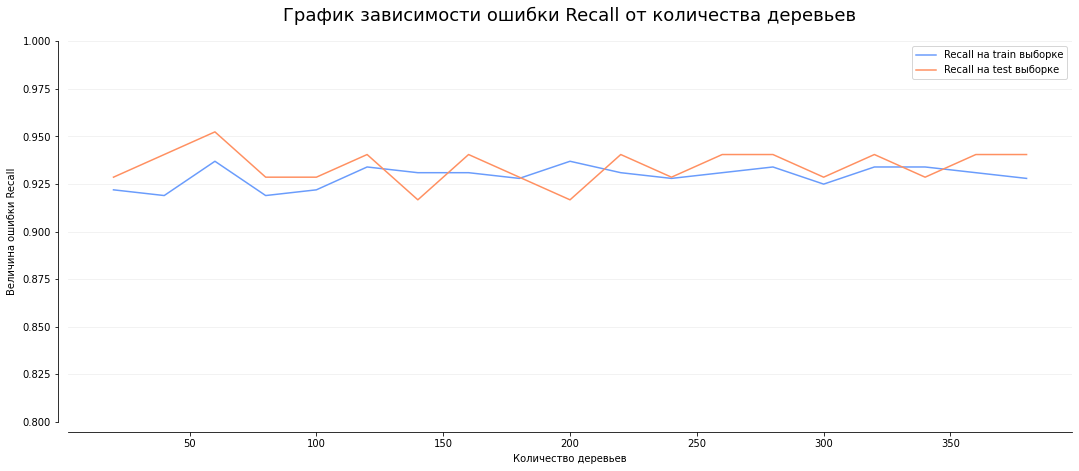

In [232]:
fig, ax = plt.subplots(1,1)
#ax.set_xticks(range(13))

errors_table.plot(kind = 'line', x = 'n_estimators', y = 'train_errors', 
                           figsize = (18, 7), ax = ax, color = '#6A9CFC', legend = True, label = 'Recall на train выборке')

errors_table.plot(kind = 'line', x = 'n_estimators', y = 'test_errors', 
                           figsize = (18, 7), ax = ax, color = '#FF9061', legend = True, label = 'Recall на test выборке')

sns.despine(offset=10, trim=False)
plt.xlabel('Количество деревьев',labelpad=5) 
plt.ylabel('Величина ошибки Recall',labelpad=5) 
plt.title('График зависимости ошибки Recall от количества деревьев', pad = 20, fontsize=18)
ax.grid(axis='y', alpha=0.2)
ax.set_ylim(0.8, 1)

In [238]:
%%time

max_depth = np.arange(1, 20, 1)
train_errors = []
test_errors = []
for m in max_depth:
    rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 140, max_features = 'auto', max_depth = m)
    rfc.fit(X_train, y_train)
    train_errors.append(recall_score(y_train, rfc.predict(X_train)))
    test_errors.append(recall_score(y_test, rfc.predict(X_test)))

    
errors_table = pd.DataFrame({'max_depth':max_depth, 'train_errors':train_errors, 'test_errors':test_errors})

CPU times: user 5.87 s, sys: 35 ms, total: 5.91 s
Wall time: 5.91 s


In [239]:
errors_table[errors_table['train_errors'] == max(errors_table['train_errors'])]

,max_depth,train_errors,test_errors
9,10,1.0,0.916667
10,11,1.0,0.952381
11,12,1.0,0.940476
12,13,1.0,0.916667
13,14,1.0,0.940476
14,15,1.0,0.940476
15,16,1.0,0.940476
16,17,1.0,0.928571
17,18,1.0,0.928571
18,19,1.0,0.916667


(0.8, 1.0)

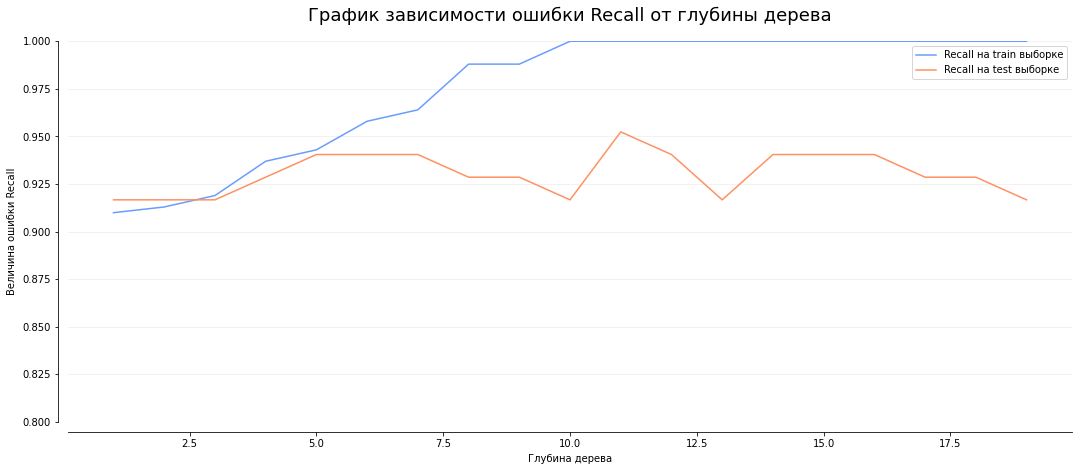

In [241]:
fig, ax = plt.subplots(1,1)
#ax.set_xticks(range(13))

errors_table.plot(kind = 'line', x = 'max_depth', y = 'train_errors', 
                           figsize = (18, 7), ax = ax, color = '#6A9CFC', legend = True, label = 'Recall на train выборке')

errors_table.plot(kind = 'line', x = 'max_depth', y = 'test_errors', 
                           figsize = (18, 7), ax = ax, color = '#FF9061', legend = True, label = 'Recall на test выборке')

sns.despine(offset=10, trim=False)
plt.xlabel('Глубина дерева',labelpad=5) 
plt.ylabel('Величина ошибки Recall',labelpad=5) 
plt.title('График зависимости ошибки Recall от глубины дерева', pad = 20, fontsize=18)
ax.grid(axis='y', alpha=0.2)
ax.set_ylim(0.8, 1)

In [265]:
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 140, max_features = 'auto', max_depth = 11)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(f'model: {str(rfc)}')
print(f'ROC-AUC: {roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

model: RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=140)
ROC-AUC: 0.9431216931216931
Precision: 0.8602150537634409
Recall: 0.9523809523809523
F1: 0.903954802259887
Accuracy: 0.8843537414965986


Оптимальное количество деревьев выбрать практически невозможно, глубина дерева около 10 дает нормальный результат

## 14. Довольны ли вы результатами? В частности, если классы не сбалансированы, то результат может оказаться неприемлемым. В этом случае можете применить методы балансировки из библиотеки imbalanced-learn.

Из-за того, что данных недостаточно целевая картина искажается. В итоге нельзя дать однозначный ответ. В данном примере классы были сбалансированы

## 15. Сделать общие выводы

В этой задаче нужно погружаться в природу данных, если просто пытаться тюнить параметры или накручивать миллион разных моделей или сеток от этого ничего не изменится. Тут достаточно использовать одну простую модель, но перед этим хорошенько поговорить с людьми, которые разрабираются в этой области. Например некоторые признаки спокойно могут нелинейно зависить на таргет переменную или может информации, которая предоставлена тут просто недостаточно, может нужна целая мед. карта пациента с анамнезом и полноценной историей наблюдений